# Исследование продаж игр для интернет-магазина "Стримчик"

***Цели исследования:***

1. Изучить исторические данные о продажах игр.
2. Выявить закономерности и факторы, определяющие успешность продажи игры.
3. Составить портрет конечного потребителя по каждому региону.  
4. Проверить отдельные гипотезы о пользовательских рейтингах игр.

***Задачи и ход исследования:***

1. Предобработка данных.
2. Исследовательский анализ данных.

   - Построить распределение игр по годам. Определить актуальный период.
   - Построить распределение продаж игр по консолям. Выявить консоли-лидеры по продажам и определить временной период для построения прогноза продаж на 2017 год.
   - Проверить данные на наличие зависимости продаж от оценок критиков и пользователей.
   - Построить распределение выпускаемых игр по жанрам и продаж этих же игр по жанрам. Выявить наиболее популярные и наиболее продаваемые жанры игр.
3. Проверить предпочтения пользователей в выборе платформы, жанра игры и ее рейтинга в разрезе продаж по регионам. Составить портреты типичных пользователей по регионам.
4. Проверка гипотез.
   - Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
   - Гипотеза №2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
5. Формирование общих выводов, полученных в ходе исследования.

## Загрузка данных

In [1]:
# Все импорты тут:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
# Открытие данных через конструкцию try-except
try:
    games_data = pd.read_csv('datasets/games.csv')
except:
    games_data = pd.read_csv('/datasets/games.csv')

In [3]:
display(games_data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
display(games_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [5]:
display(games_data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Загрузив данные, я заметил, что для дальнейшей работы с данными необходимо:

1) Привести названия столбцов к нижнему регистру.
2) Провести проверку на наличие дубликатов.
3) Заполнить пропуски в столбцах `critic_score`, `user_score`, `rating`, если это возможно.
4) Изменить тип данных в столбцах:
  - `critic_score`: float64 -> int64
  - `user_score`: object -> int64
- Привести столбцы `critic_score` и `user_score` в систему исчисления, равную по размерности.
- Создать столбец `total_sales` с суммарными продажами по всем регионам.

## Предобработка данных

### Приведение названий столбцов к нижнему регистру

In [7]:
games_data.columns = games_data.columns.str.lower()

### Проверка на наличие дубликатов

Проверка на наличие явных дубликатов

In [8]:
games_data.duplicated().sum()

0

Проверка на наличие неявных дубликатов по нескольким столбцам. 

In [9]:
games_data[['name', 'platform', 'year_of_release']].duplicated().sum()

2

In [10]:
# Удалим выявленные дубликаты
games_data = games_data.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop=True)

### Поиск и замена пропущенных значений

In [11]:
games_data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

#### Столбец `name`

Столбец `name` содержит всего 1 строку с пропущенными значениями. Необходимо проверить ее на возможность осуществления каких-либо замен. Так как это всего 1 строка, то сделать это будет несложно.

In [12]:
# Пропуски в столбце 'name'
games_data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


По этой строке пропуски в столбцах 'name', 'genre', 'critic_score', 'user_score' и 'rating'. 
Такие данные восстановить будет весьма проблематично, заполнять по ним пропуски не представляет особой важности для исследовательского анализа всего датафрейма. Эту строку необходимо удалить.

In [13]:
games_data = games_data.dropna(subset=['name'])

#### Столбец `year_of_release`

Необходимо проверить набор данных, который содержится в столбце `year_of_release`, чтобы он не содержал разного рода сокращения (98 = 1998, 4 = 2004)

In [14]:
games_data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Из представленных данных видно, что сокращений не обнаружено. 

In [15]:
# Пропущенные значения года релиза можно заменить с помощью медианного значения года по каждой отдельно взятой платформе, на которых выпускались игры. 

In [16]:
# Заполнение пропусков в столбце year_of_release средним значением года по отдельно взятой платформе 

# for platform in games_data['platform'].unique():
#     games_data.loc[(games_data['platform'] == platform) & (games_data['year_of_release'].isna()), 'year_of_release'] = games_data.loc[(games_data['platform']==platform), 'year_of_release'].median()

#### Столбцы `critic_score` и `user_score`

Просмотрим данные в столбце с оценкой пользователей. Не содержат ли они других "выбивающихся" данных, кроме 'tbd'.

In [17]:
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Удалось выяснить, что данные в столбце 'user_score' со значением 'tbd' означают, что данные уточняются. Значит, необходимо избавиться от этого значения и пока начать работу с пропусками (Na). Заменим 'tbd' на 'None'.

In [18]:
games_data['user_score'] = games_data['user_score'].replace('tbd', None)

In [19]:
# В столбцах `critic_score` и `user_score` данные могут отсутствовать из-за наличия дубликатов в столбце `name`. На одной платформе у игры может стоять оценка, а на другой платформе - нет. Значит, заполнить пропуски в столбцах `critic_score` и `user_score` можно максимальным значением по отдельно взятым названиям игры в столбце `name`.

In [20]:
# Замена осуществляется с помощью цикла. 
# Для ускорения работы цикла необходимо создать срез, по которому будет осуществляться перебор данных.  

# Срез
# names_data = games_data.query('critic_score.isna()==True | user_score.isna()==True')
# # Цикл
# for name in names_data['name'].unique():
#     games_data.loc[(games_data['name'] == name) & (games_data['critic_score'].isna()), 'critic_score'] = games_data.loc[games_data['name']==name, 'critic_score'].astype('float',errors='ignore').max()
#     games_data.loc[(games_data['name'] == name) & (games_data['user_score'].isna()), 'user_score'] = games_data.loc[games_data['name']==name, 'user_score'].astype('float',errors='ignore').max()

In [21]:
games_data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         7953
rating             6764
dtype: int64

Оставшиеся пропуски в столбцах `critic_score` и `user_score` можно трактовать как отсутствие оценок. Значит, эти игры по каким-то причинам не оценивали (нет данных об оценках от издательств о наиболее "устаревших" играх, либо игра не была популярна в широких кругах потребителей). Данные можно заменить на 0. 

In [22]:
games_data['critic_score'] = games_data['critic_score'].fillna(0)
games_data['user_score'] = games_data['user_score'].fillna(0)

#### Столбец `rating`

In [23]:
# В столбце `rating` возрастные ограничения во многом определяются жанром самой игры. Значит, заполнять такие пропуски можно самым популярным значением в столбце `rating` по каждому отдельно взятому жанру.

In [24]:
# for genre in games_data['genre'].unique():
#     games_data.loc[(games_data['genre'] == genre) & (games_data['rating'].isna()), 'rating'] = games_data.loc[games_data['genre']==genre, 'rating'].value_counts().index[0]
 

In [25]:
games_data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

### Изменение типов данных

In [26]:
# Посмотрим более детально, какие типы данных в таблице на данный момент
display(games_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

Необходимо заменить тип данных в следующих столбцах:

<u>critic_score:</u> float64 -> int64

<u>user_score:</u> object -> float64 -> int64

In [27]:
# year_of_release: float64 -> int64
# games_data['year_of_release'] = games_data['year_of_release'].astype('int', errors='raise')

In [28]:
# user_score: object -> float64
games_data['user_score'] = games_data['user_score'].astype('float', errors='raise')

Столбцы отзывов имеют следующий вид на данный момент:
- `critic_score` — оценка критиков (максимум 100), тип `float64`
- `user_score` — оценка пользователей (максимум 10), тип `float64`

Для наиболее наглядного представления разных видов оценок, их необходимо привести к одной и той же системе исчисления. Легче всего будет умножить столбец `user_score` на 10. 

In [29]:
games_data['user_score'] = games_data['user_score'].apply(lambda x: x*10)

In [30]:
# critic_score: float64 -> int64
games_data['critic_score'] = games_data['critic_score'].astype('int', errors='raise')
# user_score: float64 -> int64
games_data['user_score'] = games_data['user_score'].astype('int', errors='raise')

In [31]:
# Посмотрим, насколько успешно произведена замена типов данных
display(games_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  int64  
 9   user_score       16712 non-null  int64  
 10  rating           9948 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


None

### Столбец 'total_sales' - суммарные продажи по всем регионам

Столбец `total_sales` с итоговыми продажами добавим в общую таблицу в начале (после столбца `genre`, индекс 4)

In [32]:
# Функция по подсчету суммы столбцов
def total_sales(games_data):
    total_sales = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
    return total_sales

In [33]:
games_data.insert(4, 'total_sales', total_sales(games_data))

In [34]:
games_data.head()

,name,platform,year_of_release,genre,total_sales,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,82.54,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985.0,Platform,40.24,29.08,3.58,6.81,0.77,0,0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.38,11.27,8.89,10.22,1.00,0,0,NaN


## Исследовательский анализ данных

### Релизы игр по годам

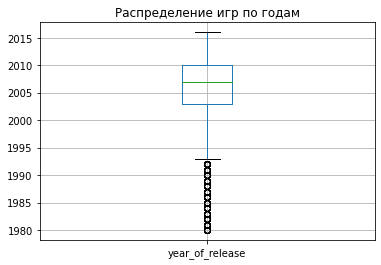

In [35]:
games_data.boxplot(column='year_of_release')
plt.title('Распределение игр по годам')
plt.show()

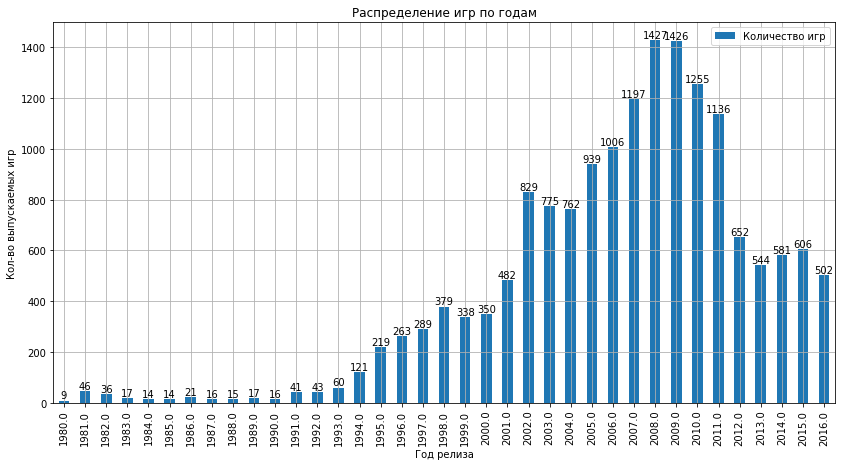

In [36]:
ax = games_data.pivot_table(index='year_of_release',
                            values='name',
                            aggfunc='count').sort_values(by='year_of_release').plot(kind='bar',
                                                                               grid=True,
                                                                               figsize=(14, 7),
                                                                              label='count')
plt.legend(['Количество игр'])
plt.title('Распределение игр по годам')
plt.ylabel('Кол-во выпускаемых игр')
plt.xlabel('Год релиза')
# Добавление подписей через plt.annotate
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',                
                (p.get_x() + p.get_width() / 2, height),  
                ha='center',                     
                va='bottom')    
plt.show()

- По построенной столбчатой диаграмме видно, что начиная с 2010 года количество игр начало сокращаться. За период 2012-2016 годов количество игр сократилось вдвое по сравнению в 2010 годом. Могу предположить, что в тот момент, когда имеющиеся исторические данные добывались из открытых источников, за данные периода 2012-2016 годов были добыты не в полном объеме. Либо мы имеем дело с падением темпов производства игр на 65% в 2016 году по сравнению с 2009 годом.
- Исходя из данных, полученных в диаграмме размаха и построенной столбчатой диаграмме, можно сделать вывод, что данные до 1995 года не важны в исследовании. Эти данные представляют собой "нетипичные" значения, когда количество выпускаемых игр на консоли за год было меньше 200 млн. копий.

In [37]:
games_data = games_data.query("year_of_release > 1994")

### Продажи игр по платформам

Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.

Сначала необходимо найти платформы-лидеры по совокупным продажам

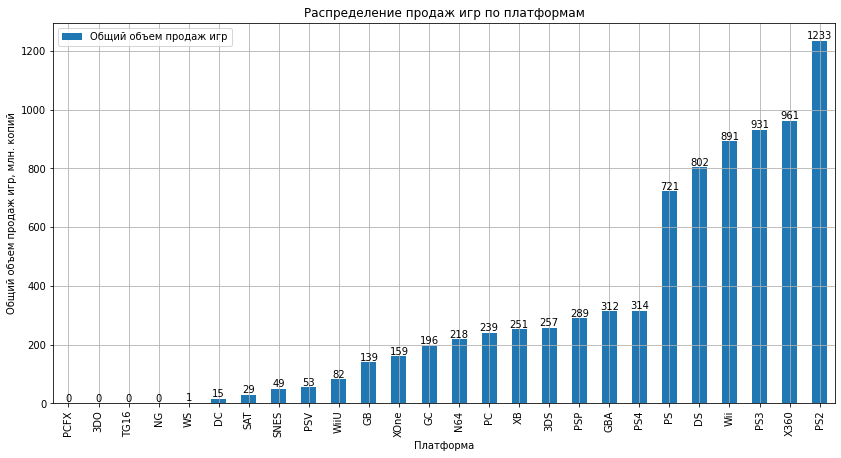

In [38]:
ax = games_data.pivot_table(index='platform',
                            values='total_sales',
                            aggfunc='sum').sort_values(by='total_sales').plot(kind='bar',
                                                                              grid=True,
                                                                              figsize=(14, 7))
plt.legend(['Общий объем продаж игр'])
plt.title('Распределение продаж игр по платформам')
plt.ylabel('Общий объем продаж игр, млн. копий')
plt.xlabel('Платформа')

# Добавление подписей через plt.annotate
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',                
                (p.get_x() + p.get_width() / 2, height),  
                ha='center',                     
                va='bottom')                     

plt.show()

Добавим 6 платформ-лидеров в список

In [39]:
sales_leaders_list_large = games_data.pivot_table(index='platform',
                                            values='total_sales',
                                            aggfunc='sum').sort_values(by='total_sales').index[-6:]

In [40]:
sales_leaders_list_large

Index(['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

In [41]:
# Создадим сводную таблицу с консолями-лидерами продаж, с двухуровневой группировкой (платформа -> год релиза)
leaders_games_data = games_data.pivot_table(index=['platform','year_of_release'],
                                        values='total_sales',
                                        aggfunc='sum').sort_values(by=['platform','year_of_release']).query("platform in @sales_leaders_list_large")

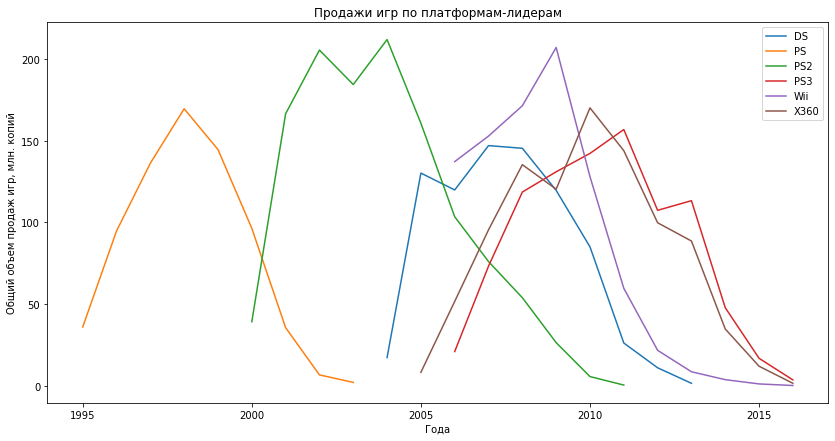

In [42]:
plt.figure(figsize=(14,7))
ax = sns.lineplot(x = 'year_of_release', y = 'total_sales', data = leaders_games_data, hue = 'platform')
ax.set(xlabel = 'Года', ylabel = 'Общий объем продаж игр, млн. копий', title = 'Продажи игр по платформам-лидерам')
plt.legend(loc='best')
plt.show()

Исходя из полученого графика можно сделать вывод, что срок эксплуатации игровых консолей (с момента выхода до момента окончания выпуска новых игр) составляет ориентировочно 10 лет.

### Определение актуального периода для прогноза на 2017 год

Как было сказано ранее, срок "жизни" консоли составляет ориентировочно 10 лет. Однако, временной период стоит ограничить 5-ю годами, так как существует высокий риск, что в данные попадут ушедшие тренды. Следовательно, актуальным периодом для построения прогноза на 2017 год стоит считать период 2012-2016 годов.  

In [43]:
# Создадим сводную таблицу с со всеми консолями за актуальный период, с двухуровневой группировкой (платформа -> год релиза)
current_games_data = games_data.pivot_table(index=['platform','year_of_release'],
                                            values='total_sales',
                                            aggfunc='sum').sort_values(by=['platform','year_of_release']).query("year_of_release > 2011")

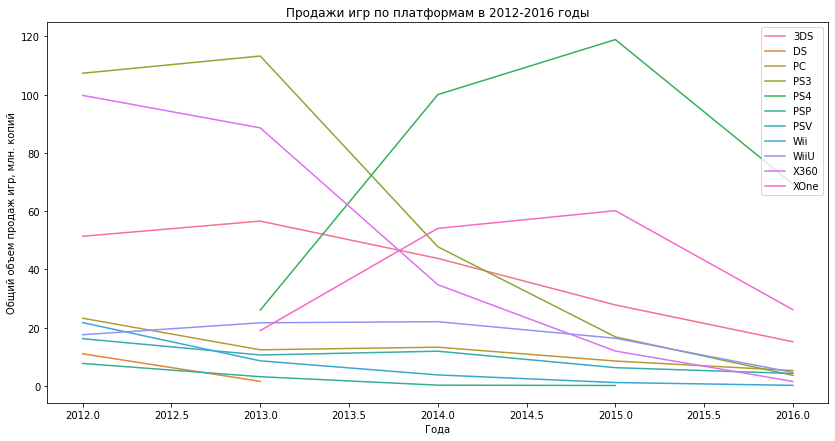

In [44]:
plt.figure(figsize=(14,7))
ax = sns.lineplot(x = 'year_of_release', y = 'total_sales', data = current_games_data, hue = 'platform')
ax.set(xlabel = 'Года', ylabel = 'Общий объем продаж игр, млн. копий', title = 'Продажи игр по платформам в 2012-2016 годы')
plt.legend(loc='best')
plt.show()

Исходя из полученого графика можно сделать следующие выводы:

1) Наиболее актуальными и перспективными платформами из представленных являются PS4 и XOne. Игры на них начали выходить в релиз с 2013 года. В 2016 году наблюдается резкое падение уровня продаж, которое в свою очередь наблюдается по всем консолям. Возможно, в данном случае речь идет о падении/просадке игровой индустрии в целом в 2016 году. Исходя из срока эксплуатации консолей (10 лет), актуальными игры на PS4 и XOne пробудут максимум до 2023 года, а дальше скорее всего необходимо будет подстраиваться под более сложные и новые технологии, которые будут использоваться в новых консолях.

2) Падающими по продажам консолями можно назвать 'PS3', 'X360' и '3DS'. Падение продаж игр на эти консоли было обратно пропорционально росту продаж игр на консоли PS4 и XOne в 2013-2015 годы. После анонса новых консолей, производители игр сократили выпуск на старые консоли и сделали упор на новое поколение гейминга. 

3) "Стабильно низким" уровнем продаж могут похвастаться 'PC', 'WiiU', 'WII' и так далее. Данные платформы не отличаются особыми перспективами. 

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

In [45]:
sales_leaders_list_small = games_data.query("year_of_release > 2011").pivot_table(index='platform',
                                                                                  values='total_sales',
                                                                                  aggfunc='sum').sort_values(by='total_sales').index[-6:]

In [46]:
sales_leaders_list_small

Index(['WiiU', 'XOne', '3DS', 'X360', 'PS3', 'PS4'], dtype='object', name='platform')

In [47]:
leaders_games_box_data = games_data.query("platform in @sales_leaders_list_small")

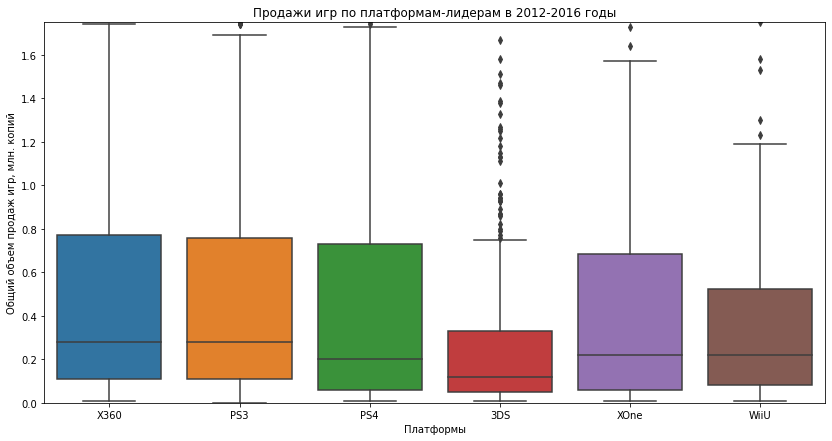

In [48]:
plt.figure(figsize=(14,7))
ax = sns.boxplot(data = leaders_games_box_data, x = 'platform', y = 'total_sales')
ax.set(xlabel = 'Платформы', ylabel = 'Общий объем продаж игр, млн. копий', title = 'Продажи игр по платформам-лидерам в 2012-2016 годы', ylim = (0,1.75))
plt.show()

В список наиболее актуальных и перспективных платформ ранее были отнесены XOne и PS4. Однако, пока  они занимают лишь 3 и 4 места соответственно ввиду того, что в 2012 году рассматриваемого периода они еще не имели никаких игровых релизов, а их предыдущие поколения - PS3 и X360 остаются лидерами по медианным продажам. 

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. 
Диаграмма рассеяния и расчет корреляции между отзывами и продажами.

В качестве примера влияния отзывов пользователей и критиков на продажи игр на консоли возьмем абсолютного лидера продаж последних 10 лет - платформу X360.

In [49]:
x360_data = games_data.query("year_of_release > 2011 & platform == 'X360'")

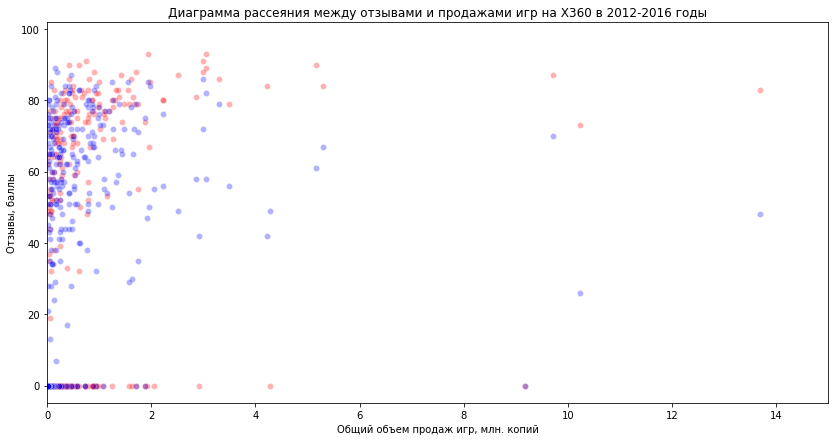

In [50]:
plt.figure(figsize=(14,7))
x360_ax = sns.scatterplot(x='total_sales', y='critic_score', data = x360_data, alpha = 0.3, color='red',)
x360_ax = sns.scatterplot(x='total_sales', y='user_score', data = x360_data, alpha = 0.3, color='blue');
x360_ax.set(xlabel = 'Общий объем продаж игр, млн. копий', ylabel = 'Отзывы, баллы', title = 'Диаграмма рассеяния между отзывами и продажами игр на X360 в 2012-2016 годы', xlim = (0,15))
plt.show()

In [51]:
# Вывод коэффициентов корреляции
critic_corr = x360_data['total_sales'].corr(x360_data['critic_score'])
user_corr = x360_data['total_sales'].corr(x360_data['user_score'])

print(f"Коэффициент корреляции между совокупными продажами и оценками критиков равен: {critic_corr}")
print(f"Коэффициент корреляции между совокупными продажами и оценками пользователей равен: {user_corr}")

Коэффициент корреляции между совокупными продажами и оценками критиков равен: 0.26202840220219653
Коэффициент корреляции между совокупными продажами и оценками пользователей равен: 0.08726773272692527


Коэффициент корреляции 0.26 <span style="color:red">**между совокупными продажами и оценками критиков**</span> свидетельствует о наличии умеренной положительной связи. Данный результат заслуживает внимания, так как он показывает, что оценка критиков действительно оказывает заметное влияния на продажи игр. 

Если же говорить про корреляцию <span style="color:blue">**между совокупными продажами и оценками пользователей**</span>, равную 0.09, то подобная связь характеризуется как незначительная положительная. Благодаря этому, можно сделать вывод, что оценки пользователей не оказывают заметного влияния на объем продаж игр **по данной консоли в рамках рассматриваемого датафрейма**. Однако, если углубиться дальше и исследовать большие объемы данных, то этот фактор действительно не стоит оставлять без внимания. 

[Ссылка на данные](https://sky.pro/wiki/analytics/koeffitsient-korrelyatsii-polnaya-tablitsa-znachenij-i-ih-interpretatsiya/?ysclid=maprmnzkw3993645811)

### Проверка соответствия выводов с продажами на других платформах

В процессе проверки выводов в качестве примера возьмем консоли PS3 и XOne, которые находились на 2-м и 3-м местах за 2011-2016 годы по медиане объема продаж. 

#### PS3

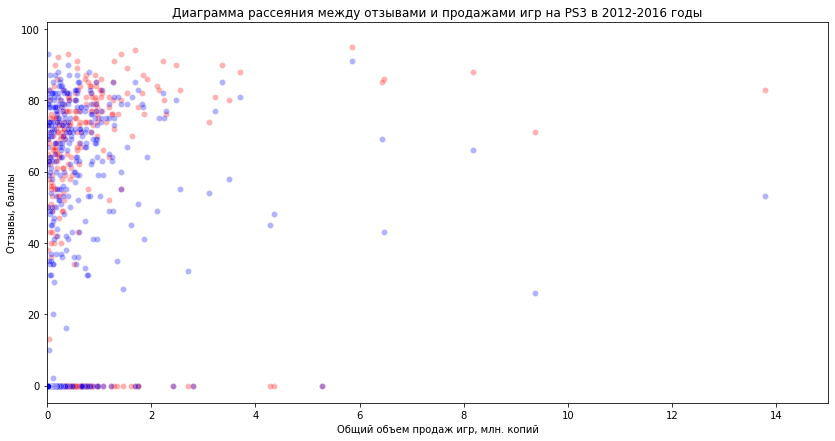

Коэффициент корреляции между совокупными продажами и оценками критиков равен: 0.3007827708439654
Коэффициент корреляции между совокупными продажами и оценками пользователей равен: 0.19988084216497873


In [52]:
# Сделаем датафреймы
ps3_data = games_data.query("year_of_release > 2011 & platform == 'PS3'")

# Вывод диаграммы
plt.figure(figsize=(14,7))
ps3_ax = sns.scatterplot(x='total_sales', y='critic_score', data = ps3_data, alpha = 0.3, color='red',)
ps3_ax = sns.scatterplot(x='total_sales', y='user_score', data = ps3_data, alpha = 0.3, color='blue');
ps3_ax.set(xlabel = 'Общий объем продаж игр, млн. копий', ylabel = 'Отзывы, баллы', title = 'Диаграмма рассеяния между отзывами и продажами игр на PS3 в 2012-2016 годы', xlim = (0,15))
plt.show()


# Вывод коэффициентов корреляции
critic_corr = ps3_data['total_sales'].corr(ps3_data['critic_score'])
user_corr = ps3_data['total_sales'].corr(ps3_data['user_score'])
print(f"Коэффициент корреляции между совокупными продажами и оценками критиков равен: {critic_corr}")
print(f"Коэффициент корреляции между совокупными продажами и оценками пользователей равен: {user_corr}")

Коэффициент корреляции 0.30 <span style="color:red">**между совокупными продажами и оценками критиков**</span> свидетельствует о наличии умеренной положительной связи. Это соответствует выводам, полученным при рассмотрении платформы X360. 

Коэффициент корреляции 0.20 <span style="color:blue">**между совокупными продажами и оценками пользователей**</span> свидетельствует о наличии слабой положительной связи. Это соответствует выводам, полученным при рассмотрении платформы X360. 

#### XOne

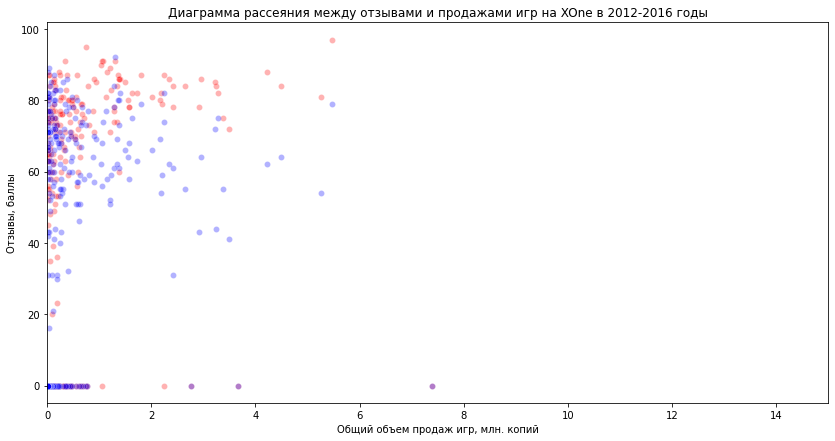

Коэффициент корреляции между совокупными продажами и оценками критиков равен: 0.2748391874944539
Коэффициент корреляции между совокупными продажами и оценками пользователей равен: 0.10315567058326079


In [53]:
# Сделаем датафреймы
xone_data = games_data.query("year_of_release > 2011 & platform == 'XOne'")

# Вывод диаграммы
plt.figure(figsize=(14,7))
xone_ax = sns.scatterplot(x='total_sales', y='critic_score', data = xone_data, alpha = 0.3, color='red',)
xone_ax = sns.scatterplot(x='total_sales', y='user_score', data = xone_data, alpha = 0.3, color='blue');
xone_ax.set(xlabel = 'Общий объем продаж игр, млн. копий', ylabel = 'Отзывы, баллы', title = 'Диаграмма рассеяния между отзывами и продажами игр на XOne в 2012-2016 годы', xlim = (0,15))
plt.show()


# Вывод коэффициентов корреляции
critic_corr = xone_data['total_sales'].corr(xone_data['critic_score'])
user_corr = xone_data['total_sales'].corr(xone_data['user_score'])
print(f"Коэффициент корреляции между совокупными продажами и оценками критиков равен: {critic_corr}")
print(f"Коэффициент корреляции между совокупными продажами и оценками пользователей равен: {user_corr}")

Коэффициент корреляции 0.27 <span style="color:red">**между совокупными продажами и оценками критиков**</span> свидетельствует о наличии слабой положительной связи. Это не соответствует выводам, полученным при рассмотрении платформы X360. Во многом это связано с отсутствием достаточного объема данных, так как продаже игр на данную платформу стартовали только в 2013 году.

Коэффициент корреляции 0.10 <span style="color:blue">**между совокупными продажами и оценками пользователей**</span> свидетельствует о наличии слабой положительной связи. Это соответствует выводам, полученным при рассмотрении платформы X360. 

### Общее распределение игр по жанрам
Самые прибыльные жанры. Игры с высокими и низкими продажами.

Сначала посмотрим распределение выпускаемых игр по жанрам. Определим наиболее и наименее популярные игры в производстве.

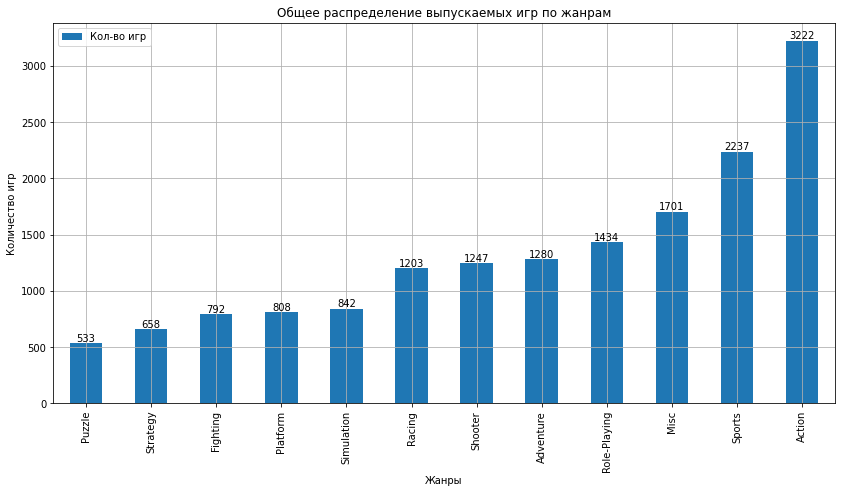

In [54]:
ax = games_data.pivot_table(index='genre',
                            values='name',
                            aggfunc='count').sort_values(by='name').plot(kind='bar',
                                                                         grid=True,
                                                                         figsize=(14, 7))
plt.legend(['Кол-во игр'])
plt.title('Общее распределение выпускаемых игр по жанрам')
plt.ylabel('Количество игр')
plt.xlabel('Жанры')

# Добавление подписей через plt.annotate
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',                
                (p.get_x() + p.get_width() / 2, height),  
                ha='center',                     
                va='bottom')                     

plt.show()

Из построенной столбчатой диаграммы видно, что в выпускаемых играх преобладают жанры:

1) Экшен
2) Спорт
3) Смешанный жанр

Теперь посмотрим распределение общих продаж игр по жанрам. Определим наиболее и наименее популярные игры среди пользователей.

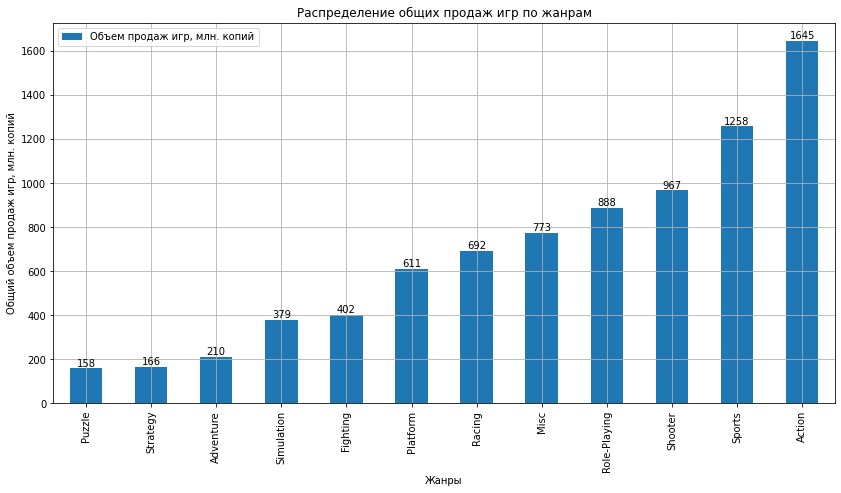

In [55]:
ax = games_data.pivot_table(index='genre',
                            values='total_sales',
                            aggfunc='sum').sort_values(by='total_sales').plot(kind='bar',
                                                                              grid=True,
                                                                              figsize=(14, 7))
plt.legend(['Объем продаж игр, млн. копий'])
plt.title('Распределение общих продаж игр по жанрам')
plt.ylabel('Общий объем продаж игр, млн. копий')
plt.xlabel('Жанры')

# Добавление подписей через plt.annotate
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',                
                (p.get_x() + p.get_width() / 2, height),  
                ha='center',                     
                va='bottom')                     

plt.show()

Из построенной столбчатой диаграммы видно, что наиболее успешными по продажам жанрами являются:

1) Экшен
2) Спорт
3) Шутер

Согласно двум построенным диаграммам можно сделать вывод, что наиболее популярными в производстве и потреблениями являются игры жанров Экшен и Спорт. 

Остальные жанры были смещены со своих мест во второй таблице по сравнению с первой. Для более наглядного представления стоит построить диаграмму с "коэффициентом продаж игр", который будет относительной величиной, определяющей успешность продаж по жанрам.

<u>Коэффициент продаж будет показывать отношение по жанрам:</u>

**Общий объем продаж игр, млн. копий / Общее количество выпущенных игр**

Для начала необходимо построить сводную таблицу.

In [56]:
# Создание сводной таблицы с общими продажами игр по жанрам
genres_data = games_data.pivot_table(index='genre',values='total_sales',aggfunc='sum')

# Добавление столбца с количеством выпущенных игр по жанрам
genres_data['games_quantity'] = games_data.pivot_table(index='genre',values='name',aggfunc='count')

# Добавление столбца с коэффециентом
genres_data['k'] = genres_data['total_sales'] / genres_data['games_quantity']

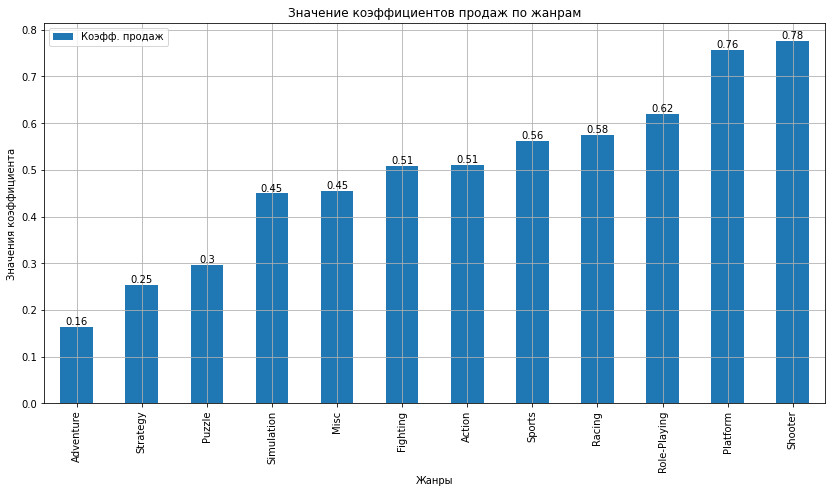

In [57]:
# Построение диаграммы
ax = genres_data['k'].sort_values().plot(kind='bar',
                                              grid=True,
                                              figsize=(14, 7))
plt.legend(['Коэфф. продаж'])
plt.title('Значение коэффициентов продаж по жанрам')
plt.ylabel('Значения коэффициента')
plt.xlabel('Жанры')

# Добавление подписей через plt.annotate
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height.round(2)}',                
                (p.get_x() + p.get_width() / 2, height),  
                ha='center',                     
                va='bottom')                     

plt.show()

<u>Из построенной диаграммы можно сделать вывод, что наиболее успешными в продажах являются следующие жанры:<u/>

1) Шутер
2) Платформер
3) Ролевые

<u>Наименее успешные по продажам жанры:<u/>

1) Приключения
2) Стратегии
3) Пазлы

## Портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [58]:
# Сводная таблица
region_platform_data = games_data.query("year_of_release > 2011").pivot_table(index='platform',
                                                                              values=['na_sales','eu_sales','jp_sales'],
                                                                              aggfunc='sum')

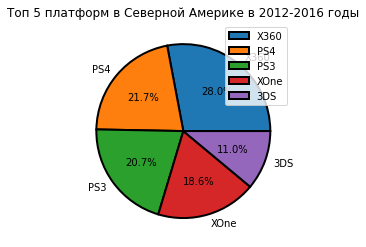

In [59]:
# Диаграмма по Северной Америке
na_platform = region_platform_data.sort_values(by='na_sales', ascending=False)[:5]
na_platform.plot(kind='pie',y='na_sales',autopct='%1.1f%%',wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"},title='Топ 5 платформ в Северной Америке в 2012-2016 годы')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

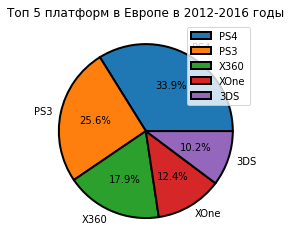

In [60]:
# Диаграмма по Европе
eu_platform = region_platform_data.sort_values(by='eu_sales', ascending=False)[:5]
eu_platform.plot(kind='pie',y='eu_sales',autopct='%1.1f%%',wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"},title='Топ 5 платформ в Европе в 2012-2016 годы')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

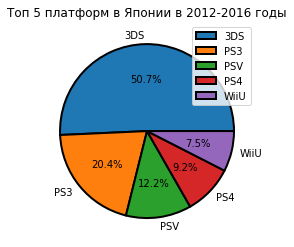

In [61]:
# Диаграмма по Японии
jp_platform = region_platform_data.sort_values(by='jp_sales', ascending=False)[:5]
jp_platform.plot(kind='pie',y='jp_sales',autopct='%1.1f%%',wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"},title='Топ 5 платформ в Японии в 2012-2016 годы')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

In [62]:
# Сводная таблица
region_genre_data = games_data.query("year_of_release > 2011").pivot_table(index='genre',
                                                                           values=['na_sales','eu_sales','jp_sales'],
                                                                           aggfunc='sum')

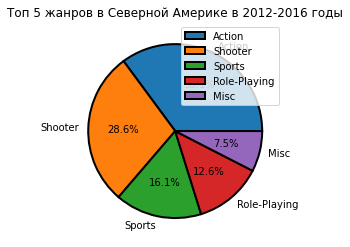

In [63]:
# Диаграмма по Северной Америке
na_genre = region_genre_data.sort_values(by='na_sales', ascending=False)[:5]
na_genre.plot(kind='pie',y='na_sales',autopct='%1.1f%%',wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"},title='Топ 5 жанров в Северной Америке в 2012-2016 годы')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

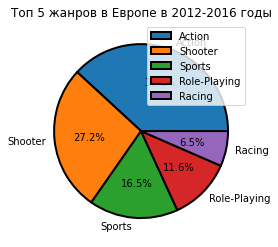

In [64]:
# Диаграмма по Европе
eu_genre = region_genre_data.sort_values(by='eu_sales', ascending=False)[:5]
eu_genre.plot(kind='pie',y='eu_sales',autopct='%1.1f%%',wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"},title='Топ 5 жанров в Европе в 2012-2016 годы')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

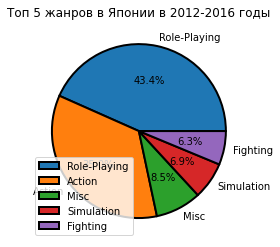

In [65]:
# Диаграмма по Японии
jp_genre = region_genre_data.sort_values(by='jp_sales', ascending=False)[:5]
jp_genre.plot(kind='pie',y='jp_sales',autopct='%1.1f%%',wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"},title='Топ 5 жанров в Японии в 2012-2016 годы')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Влияние рейтинга ESRB на продажи по регионам

In [66]:
# Сводная таблица
region_rating_data = games_data.query("year_of_release > 2011").pivot_table(index='rating',
                                                                            values=['na_sales','eu_sales','jp_sales'],
                                                                            aggfunc='sum')

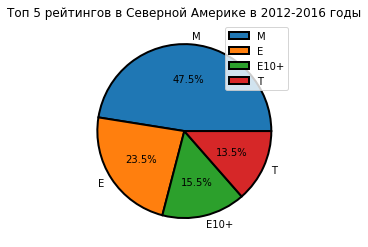

In [67]:
# Диаграмма по Северной Америке
na_rating = region_rating_data.sort_values(by='na_sales', ascending=False)[:5]
na_rating.plot(kind='pie',y='na_sales',autopct='%1.1f%%',wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"},title='Топ 5 рейтингов в Северной Америке в 2012-2016 годы')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

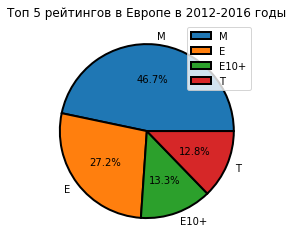

In [68]:
# Диаграмма по Европе
eu_rating = region_rating_data.sort_values(by='eu_sales', ascending=False)[:5]
eu_rating.plot(kind='pie',y='eu_sales',autopct='%1.1f%%',wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"},title='Топ 5 рейтингов в Европе в 2012-2016 годы')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

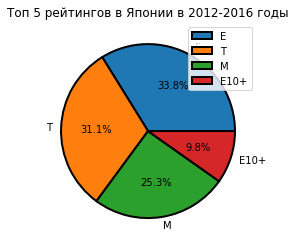

In [69]:
# Диаграмма по Японии
jp_rating = region_rating_data.sort_values(by='jp_sales', ascending=False)[:5]
jp_rating.plot(kind='pie',y='jp_sales',autopct='%1.1f%%',wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"},title='Топ 5 рейтингов в Японии в 2012-2016 годы')
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Выводы по портрету пользователя региона 

***Платформы.***

Предпочтения к выбору платформы для гейминга различны между регионами. Могу предположить, что это во многом связано со стоимостью самих платформ и игр на них для разных регионов. Стоимость во много зависит от маркетинговой стратегии и происхождения самой компании-производителя. Так, например, американская консоль X360 от компании Microsoft лидирует в продажах игр в Северной Америке, хоть и с незначительным отрывом, в то время как в Японии приставки от американской компании даже не представлены в Топ-5. В Европе пользователи отдают предпочтение японской компании Sony, так как первое и второе место в Европе занимают консоли разного поколения от этого производителя. 


***Жанры.***
- Если же рассматривать жанровые предпочтения в играх у пользователейц разнвх регионов, то можно заметить, что в Северной Америке и Европе потребители ведут себя одинако, так как представленные жанры из Топ-5 и занимаемая ими доля рынка практически идентичны. Исключение составляет лишь расположение игр смешанного жанра и гонок на 5-м месте в зависимости от региона.
- Однако, эта тенденция не подтверждается в Японии, где наиболее популярным жанром (и с колоссальным отрывом) являются ролевые игры, которые лишь на 4-м месте в Северной Америке и Японии. 



***Рейтинги.***
- Если рассматривать наиболее продаваемые рейтинги игр, то в Северной Америке и Европе ситуация складывается аналогично, как и с жанрами, ведь топ-5 рейтингов игр и их доля от рынка практически идентичны в данных регионах. Там преобладают игры с рейтингом "М" - игры 17+, а на втором месте - игры с рейтингом "Е" - для всех возрастов. 
- В Японии, в отличие от остальных регионов, первое место занимает рейтинг "Е" - для всех возрастов, а на втором месте - игры с рейтингом "Т" - игры для подростков. 


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<u>Нулевая гипотеза H0:</u> средние пользовательские рейтинги платформ Xbox One и PC равны.

<u>Альтернативная гипотеза H1:</u> средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [70]:
# Задаём уровень значимости
alpha = 0.05

# Средний пользовательский рейтинг платформы XOne
xone_rating = games_data.query("platform == 'XOne' & year_of_release > 2011 & user_score > 0")['user_score']

# Средний пользовательский рейтинг платформы PC
pc_rating = games_data.query("platform == 'PC' & year_of_release > 2011 & user_score > 0")['user_score']

# Проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(xone_rating, pc_rating)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.5747220188229698
Нет оснований отвергнуть нулевую гипотезу


***Вывод:*** нет оснований отвергать нулевую гипотезу. Можно утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action и Sports разные

<u>Нулевая гипотеза H0:</u> средние пользовательские рейтинги жанров Action и Sports равны.

<u>Альтернативная гипотеза H1:</u> средние пользовательские рейтинги жанров Action и Sports не равны.

In [71]:
# Задаём уровень значимости
alpha = 0.05

# Средний пользовательский рейтинг жанра Action
action_rating = games_data.query("genre == 'Action' & year_of_release > 2011 & user_score > 0")['user_score']

# Средний пользовательский рейтинг жанра Sports
sports_rating = games_data.query("genre == 'Sports' & year_of_release > 2011 & user_score > 0")['user_score']

# Проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(action_rating, sports_rating)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.3390479552514562e-23
Отвергаем нулевую гипотезу


***Вывод:*** можно отвергнуть нулевую гипотезу. Есть все основания утверждать, что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

### Предобработка данных

__В разделе по предобработке данных (Шаг №2) удалось:__

- Привести названия столбцов к нижнему регистру.
- Удалить 2 неявных дубликата.
- Удалить 2 строки с полностью пропущенными значениями.
- Заполнить пропуски в столбцах `critic_score`, `user_score`.
- Изменить тип данных в столбцах:
  - `critic_score`: float64 -> int64
  - `user_score`: object -> float64 -> int64
- Привести столбцы `critic_score` и `user_score` в систему исчисления, равную по размерности.
- Создать столбец `total_sales` с суммарными продажами по всем регионам.

### Исследовательский анализ данных

__В разделе исследовательского анализа (Шаг №3) удалось:__
- Построить распределение игр по годам. Определить актуальный период, необходимый для проведения анализа. 
- Построить распределение продаж игр по консолям. Выявить консоли-лидеры по продажам и определить временной период для построения прогноза продаж на 2017 год (2012-2016 годы). Также удалось выявить наиболее актуальные и перспективные консоли (PS4 и XOne), падающие по продажам игр (PS3, X360, 3DS), стабильно низкие (PC, WiiU, WII и т.д.).
- Проверить данные на наличие зависимости продаж от оценок критиков и пользователей. Был сделан вывод, что оценки критиков могут значительно влиять на уровень продаж игр на платформе. Пользовательские оценки также оказывают влияние на объем продаж, но в гораздо меньшей степени.
- Построить распределение выпускаемых игр по жанрам и продаж этих же игр по жанрам.
    - Выявлен наиболее популярный жанр выпускаемых игр: Экшен.
    - Выявлен наиболее продаваемый жанр выпускаемых игр (по совокупным продажам): Экшен.
    - Выявлен наиболее продаваемый жанр выпускаемых игр (по относительному показателю продаж): Шутер.

Таким образом, интернет-магазину "Стримчик" в 2017 году стоит ориентироваться на перспективные платформы (PS4 и XOne) и наиболее продаваемые жанры.

### Портрет пользователя по регионам

__В разделе по составлению портрета типичного потребителя по региону (Шаг №4) удалось составить следующее:__

- В Северной Америке:
    - Платформа: X360
    - Жанр игры: Action
    - Рейтинг игры: М - игры 17+
- В Европе:
    - Платформа: PS4
    - Жанр игры: Action
    - Рейтинг игры: М - игры 17+
- В Японии:
    - Платформа: 3DS
    - Жанр игры: Role-Playing
    - Рейтинг игры: E - для всех возрастов

Таким образом, интернет-магазину "Стримчик", продающему игры по всему миру, в 2017 году стоит учитывать эти факторы при планировании закупок игр у поставщиков в разных регионах.

### Проверка гипотез

***Гипотеза №1:*** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

***Ответ:*** Можно утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

***Гипотеза №2:*** Средние пользовательские рейтинги жанров Action и Sports разные

***Ответ:*** Можно утверждать, что средние пользовательские рейтинги жанров Action и Sports разные.